In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
import re

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [4]:
# Constants
TARGET = 'sentiment'
FEATURE = 'review_body'
FEATURES = [FEATURE]
CSV = 'data/tripadvisor_reviews_1p2m.csv'

# Load Data

### Load and merge all scraped data

In [5]:
# # Loading from multiple CSVs in multiple folders (folders inside 'data')
# path_to_dir = 'data'
# merge_df = prep.load_data(path_to_dir)

# # Preview data
# print('Shape:', merge_df.shape)
# merge_df.head()

### Save all data into a single CSV

In [6]:
# merge_df.to_csv(CSV, index=False)

## To save time, load from single CSV with all data merged already

In [7]:
orig_df = prep.load_data(CSV)


Reading data/tripadvisor_reviews_1p2m.csv...


In [8]:
# Preview data
print('Shape:', orig_df.shape)
orig_df.head()

Shape: (1217375, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",NaN,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,NaN,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1


In [9]:
eda.get_nulls(orig_df)

,Total,Percent,Type
user_location,233152,0.19152,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
user_name,0,0.00000,object
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object


### Clean data

In [10]:
df = prep.clean_and_prep(orig_df)
print('Shape:', df.shape)
df.head()

Cleaning data...
Shape: (1217375, 14)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,loc,sentiment
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,positive
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,positive
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",n/a,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,positive
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,positive
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,n/a,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217375 entries, 0 to 1217374
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   review_id      1217375 non-null  int64  
 1   url            1217375 non-null  object 
 2   hotel_name     1217375 non-null  object 
 3   review_date    1217375 non-null  object 
 4   review_body    1217375 non-null  object 
 5   user_location  1217375 non-null  object 
 6   user_name      1217375 non-null  object 
 7   helpful_vote   1217375 non-null  int64  
 8   rating         1217375 non-null  float64
 9   csv            1217375 non-null  object 
 10  folder         1217375 non-null  object 
 11  city           1217375 non-null  object 
 12  loc            1217375 non-null  object 
 13  sentiment      1217375 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 179.3+ MB


# EDA

In [12]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 1217371
url: 243667
hotel_name: 779
review_date: 6099
review_body: 1217194
user_location: 72284
user_name: 998536
helpful_vote: 1279
rating: 5
csv: 779
folder: 10
city: 96
loc: 13
sentiment: 3


In [13]:
df.describe()

,review_id,helpful_vote,rating
count,1.217375e+06,1.217375e+06,1.217375e+06
mean,4.363706e+08,2.590393e+01,4.362044e+00
std,1.962223e+08,2.732269e+02,9.776615e-01
min,6.937280e+05,0.000000e+00,1.000000e+00
25%,2.644167e+08,1.000000e+00,4.000000e+00
50%,4.504562e+08,6.000000e+00,5.000000e+00
75%,6.083789e+08,2.300000e+01,5.000000e+00
max,7.568581e+08,1.172290e+05,5.000000e+00


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a84cd1390>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

Text(93.2, 0.5, '')

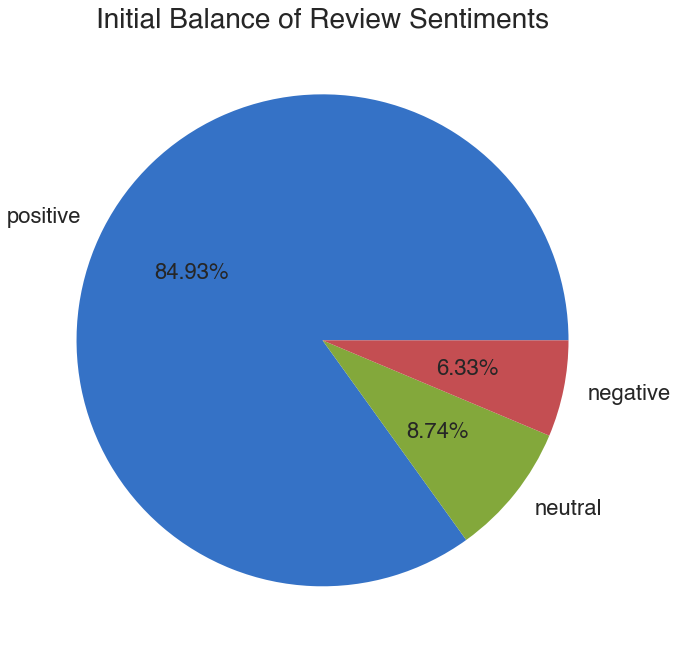

In [14]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  1217375


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a84c98390>)

Text(0.5, 1, 'Counts of Hotel Ratings')

Text(0.5, 41.400000000000006, 'Hotel Rating')

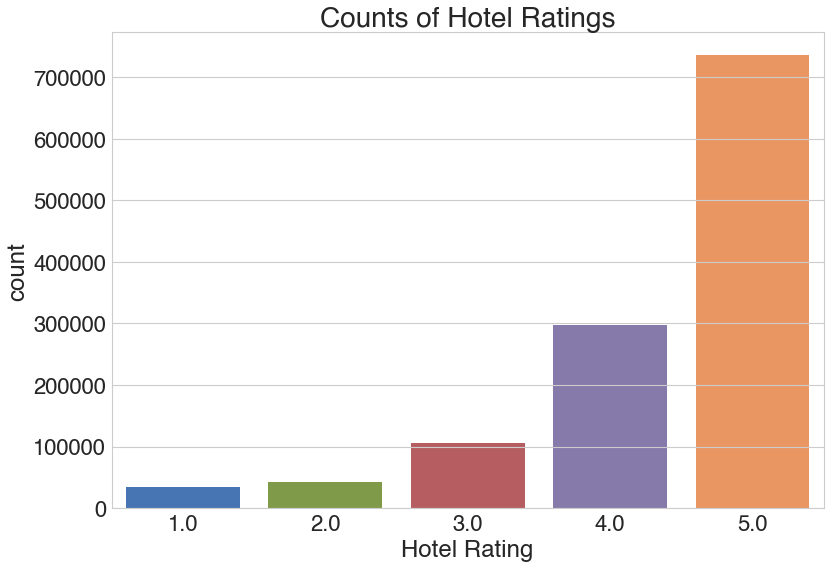

In [15]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

Total Number of Reviews: 1217375


Text(0.5, 1.0, 'Count of Hotel Reviews per Location')

Text(0, 0.5, 'Location')

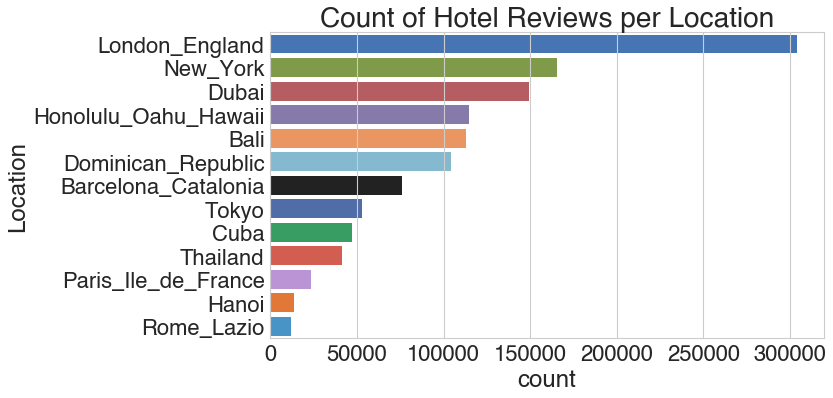

In [16]:
# Plot counts - Reviews per location
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.countplot(data=df, y='loc', ax=ax, order = df['loc'].value_counts().index, orient='h')
ax.set_title('Count of Hotel Reviews per Location', size=BIGGEST_SIZE)
ax.set_ylabel('Location')
fig.tight_layout()
fig.savefig('imgs/countplot_reviews_byLocation_full')

Text(0.5, 1.0, 'Distribution of Ratings per Location')

Text(0, 0.5, 'Hotel Rating')

Text(0.5, 0, 'Location')

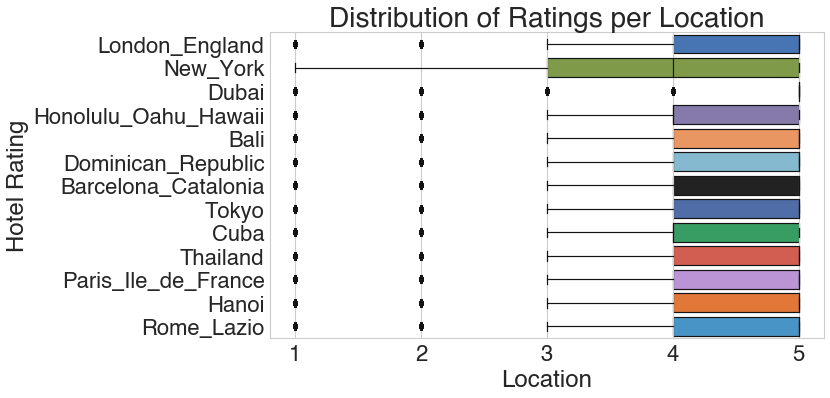

In [17]:
# Plot boxplot - Ratings per city
figsize=(12, 6)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(y='loc', x='rating', data=df, ax=ax, order = df['loc'].value_counts().index)
ax.set_title('Distribution of Ratings per Location', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('Location')
fig.tight_layout()
fig.savefig('imgs/boxplt_ratings_byLocation_full')

In [18]:
# Get sample of data to tokenize and analyze review length
num_samples = 1000
sample_df = df.sample(num_samples, random_state=42).copy()

# Stem and remove punctuation from nltk English stopwords
stemmed_stopwords = prep.set_stopwords()

# Lower case, remove punctuation and stop words
sample_df['tokenized'] = sample_df[FEATURE].str.lower()
sample_df['tokenized'] = sample_df['tokenized'].str.replace('[^\w\s]', '')
stop_pat = ' | '.join(stemmed_stopwords)
sample_df['tokenized'] = sample_df['tokenized'].str.replace(stop_pat, ' ')

# Tokenize
sample_df['tokenized'] = sample_df['tokenized'].apply(word_tokenize)

# Get review length
sample_df['review_len'] = sample_df['tokenized'].str.len()
sample_df['review_len'].describe()
print('95th percentile:', np.percentile(sample_df['review_len'],95))

count    1000.000000
mean       92.105000
std        91.081017
min        18.000000
25%        37.000000
50%        59.000000
75%       108.250000
max       726.000000
Name: review_len, dtype: float64

95th percentile: 267.1999999999998


Text(0.5, 1.0, 'Length of Reviews from Sample of 1000 Reviews')

Text(0.5, 0, 'Review Length')

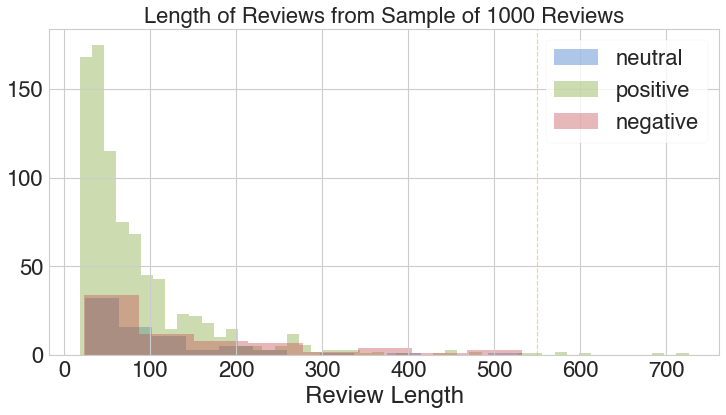

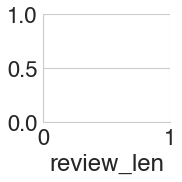

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
g = sns.FacetGrid(sample_df, hue=TARGET, hue_order=['neutral', 'positive', 'negative'])
g.map(sns.distplot, 'review_len',  kde=False, ax=ax)
ax.set_title('Length of Reviews from Sample of {} Reviews'.format(num_samples))
ax.legend()
ax.set_xlabel('Review Length')
ax.axvline(550, alpha=0.5, linestyle='dashed', color='orange')
fig.savefig('imgs/sample1000_review_len_dist')

# Train-Test-Val Split

In [20]:
# Train-test-val split - shuffled, stratified, 80:20 ratios --> 64/20/16 train/test/val
train_df, val_df, test_df = prep.train_test_val_split(df, TARGET)

	Train: 779120, Test: 243475, Val: 194780


## Handling class imbalance by under-sampling train data

In [21]:
train_df_us = prep.undersample_train(train_df, TARGET)

	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 661705
		Number neutral in train: 68069
		Number negative in train: 49346
	Final undersampled train size: 148038


In [22]:
train_df_us

,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,loc,sentiment
979894,736523580,https://www.tripadvisor.com/Hotel_Review-g1863...,Strand Palace,"January 3, 2020",Booked a Superior twin for 3 nights for just o...,Europe,"Argella_13</div><div class=""userLoc""><strong>E...",30,2.0,Strand_Palace-London_England__en.csv,links_5,London_England,London_England,negative
234010,529284069,https://www.tripadvisor.com/Hotel_Review-g6098...,Ala Moana Honolulu by Mantra,"October 2, 2017",Not Good and I will never recommend the Ala Mo...,"Keauhou, Hawaii","I616KLrogerm</div><div class=""userLoc""><strong...",2,1.0,Ala_Moana_Honolulu_by_Mantra-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Honolulu_Oahu_Hawaii,negative
227709,575488218,https://www.tripadvisor.com/Hotel_Review-g6076...,The Roosevelt Hotel,"April 24, 2018",I recently stayed at the Roosevelt hotel for a...,"San Francisco, California","jnow21</div><div class=""userLoc""><strong>San F...",20,2.0,The_Roosevelt_Hotel-New_York_City_New_York__en...,links_1,New_York_City_New_York,New_York,negative
679720,498994180,https://www.tripadvisor.com/Hotel_Review-g1874...,Alma Barcelona,"July 5, 2017",The hotel and rooms are very well designed aes...,n/a,John U,2,1.0,Alma_Barcelona-Barcelona_Catalonia__en.csv,links_9,Barcelona_Catalonia,Barcelona_Catalonia,negative
211157,398932369,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"July 29, 2016","Designed, but not workingbasically a freezer-s...",n/a,Staffan S,3,1.0,Hudson_New_York-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,New_York,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691155,258980930,https://www.tripadvisor.com/Hotel_Review-g1874...,Hotel 1898,"March 11, 2015","I absolutely love this hotel, it has a very ma...","Aguascalientes, Mexico","Herrsanchez</div><div class=""userLoc""><strong>...",160,5.0,Hotel_1898-Barcelona_Catalonia__en.csv,links_9,Barcelona_Catalonia,Barcelona_Catalonia,positive
898055,643350872,https://www.tripadvisor.com/Hotel_Review-g3200...,Excellence El Carmen,"January 3, 2019",This is a difficult review. Only because Excel...,"Atlanta, Georgia","bertshowbert</div><div class=""userLoc""><strong...",83,4.0,Excellence_El_Carmen-Uvero_Alto_Punta_Cana_La_...,links_10,Uvero_Alto_Punta_Cana_La_Altagracia_Province_D...,Dominican_Republic,positive
563991,715864553,https://www.tripadvisor.com/Hotel_Review-g2954...,Hilton Dubai Jumeirah,"October 6, 2019",JBR have many hotels but what you want....matt...,"Bangalore District, India","varunkamra</div><div class=""userLoc""><strong>B...",68,5.0,Hilton_Dubai_Jumeirah-Dubai_Emirate_of_Dubai__...,links_8,Dubai_Emirate_of_Dubai,Dubai,positive
792245,574755813,https://www.tripadvisor.com/Hotel_Review-g6084...,Mercure Bali Legian,"April 21, 2018",Stayed here with my fiancé for 9 nights and ha...,n/a,Chris N,9,5.0,Mercure_Bali_Legian-Legian_Kuta_District_Bali_...,links_7,Legian_Kuta_District_Bali,Bali,positive


Total Number of Ratings:  148038


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1c1485d0>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

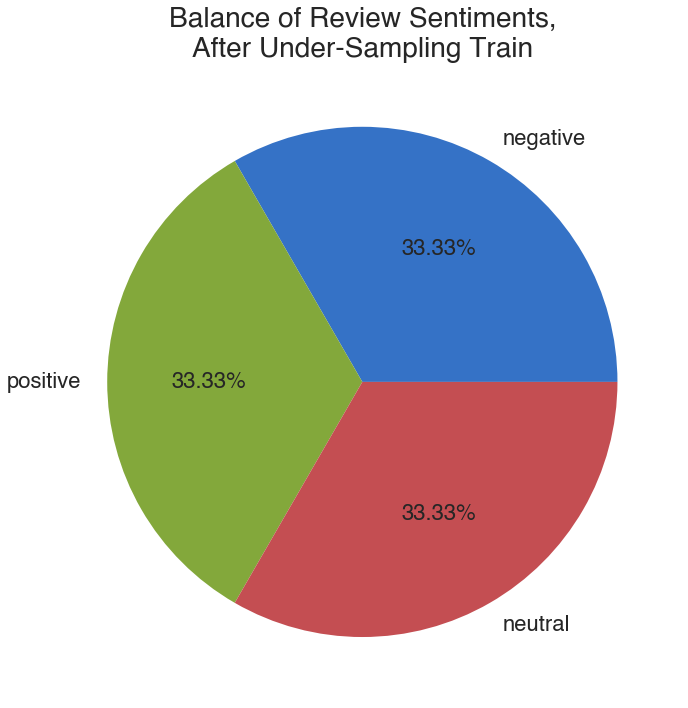

In [23]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[TARGET], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')